**IMPORT LIBRARY**


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
from PIL import Image
from tensorflow.keras.applications import VGG16
from keras.callbacks import EarlyStopping
%matplotlib inline


**SPLIT DATA TRAIN AND VALIDATION DIRECTORY**

In [2]:
train_dir = r'C:\Users\HP\Documents\SEMESTER 6\BANGKIT 2023\DATASET\Fitur1_split_new\training'
val_dir = r'C:\Users\HP\Documents\SEMESTER 6\BANGKIT 2023\DATASET\Fitur1_split_new\validation'

**Train and Validation Data Generators Creation with Image Augmentation**

In [3]:
def train_val_generators(train_dir, val_dir):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,  
                    width_shift_range=0.2,  
                    height_shift_range=0.2,  
                    shear_range=0.2,  
                    zoom_range=0.2,  
                    horizontal_flip=True, 
                    fill_mode='nearest'   
                    )


  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      class_mode='categorical',
                                                      shuffle= True,
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=val_dir,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

**Training and Validation Data Generators Retrieval with Class Information**

In [4]:
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 2400 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.


**VGG16 Model Initialization and Freezing Layers**

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# Freeze all existing layers in the VGG16 model
for layer in base_model.layers:
    layer.trainable = False


**Building Classification Model on Top of VGG16**

In [6]:

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax')) 


**Model Compilation and Callback Initialization**

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nval_accuracy has reached >90%!")
      self.model.stop_training = True
callbacks = myCallback()


early_stopping = EarlyStopping(monitor='val_loss', patience=7)

**Model Training**

In [8]:
hist = model.fit(
    train_generator,
    steps_per_epoch= 64,  
    epochs= 50,  
    validation_data=validation_generator,
    validation_steps= 32,  
    batch_size= 32,  
    callbacks=[callbacks]
)


Epoch 1/50
64/64 [==============================] - 251s 4s/step - loss: 0.9800 - accuracy: 0.6772 - val_loss: 0.5319 - val_accuracy: 0.8164
Epoch 2/50
64/64 [==============================] - 243s 4s/step - loss: 0.5083 - accuracy: 0.8311 - val_loss: 0.6334 - val_accuracy: 0.8018
Epoch 3/50
64/64 [==============================] - 241s 4s/step - loss: 0.4403 - accuracy: 0.8486 - val_loss: 0.3520 - val_accuracy: 0.8750
Epoch 4/50
64/64 [==============================] - 243s 4s/step - loss: 0.3351 - accuracy: 0.8887 - val_loss: 0.4681 - val_accuracy: 0.8535
Epoch 5/50
64/64 [==============================] - 247s 4s/step - loss: 0.3126 - accuracy: 0.8892 - val_loss: 0.4566 - val_accuracy: 0.8564
Epoch 6/50
64/64 [==============================] - 243s 4s/step - loss: 0.3233 - accuracy: 0.8979 - val_loss: 0.3886 - val_accuracy: 0.8643
Epoch 7/50
64/64 [==============================] - 246s 4s/step - loss: 0.2948 - accuracy: 0.9004 - val_loss: 0.4257 - val_accuracy: 0.8662
Epoch 8/50
64

***Display the training accuracy plot***

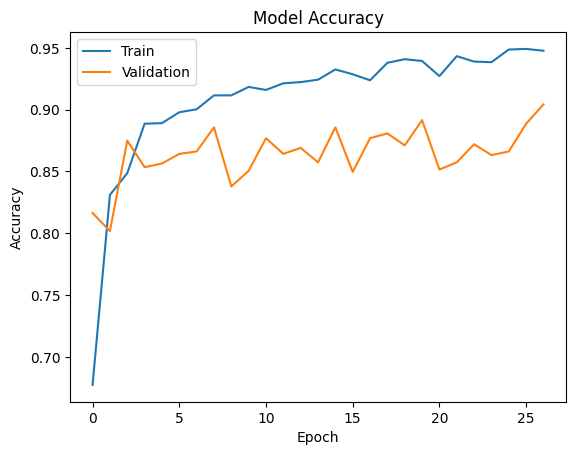

In [9]:
# Menampilkan plot akurasi pelatihan
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

***Display the training loss plot***

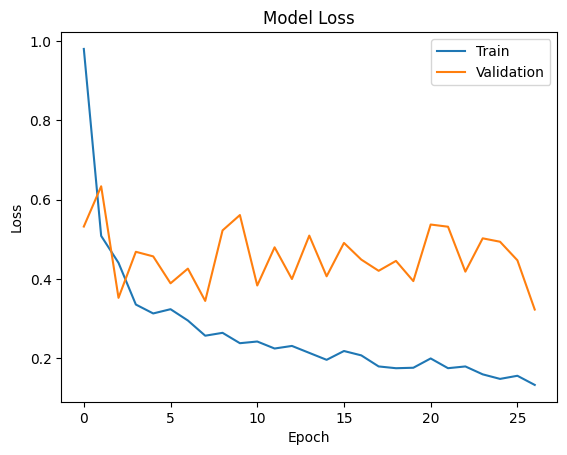

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**TEST MODEL**

1/1 [==============================] - 0s 142ms/step


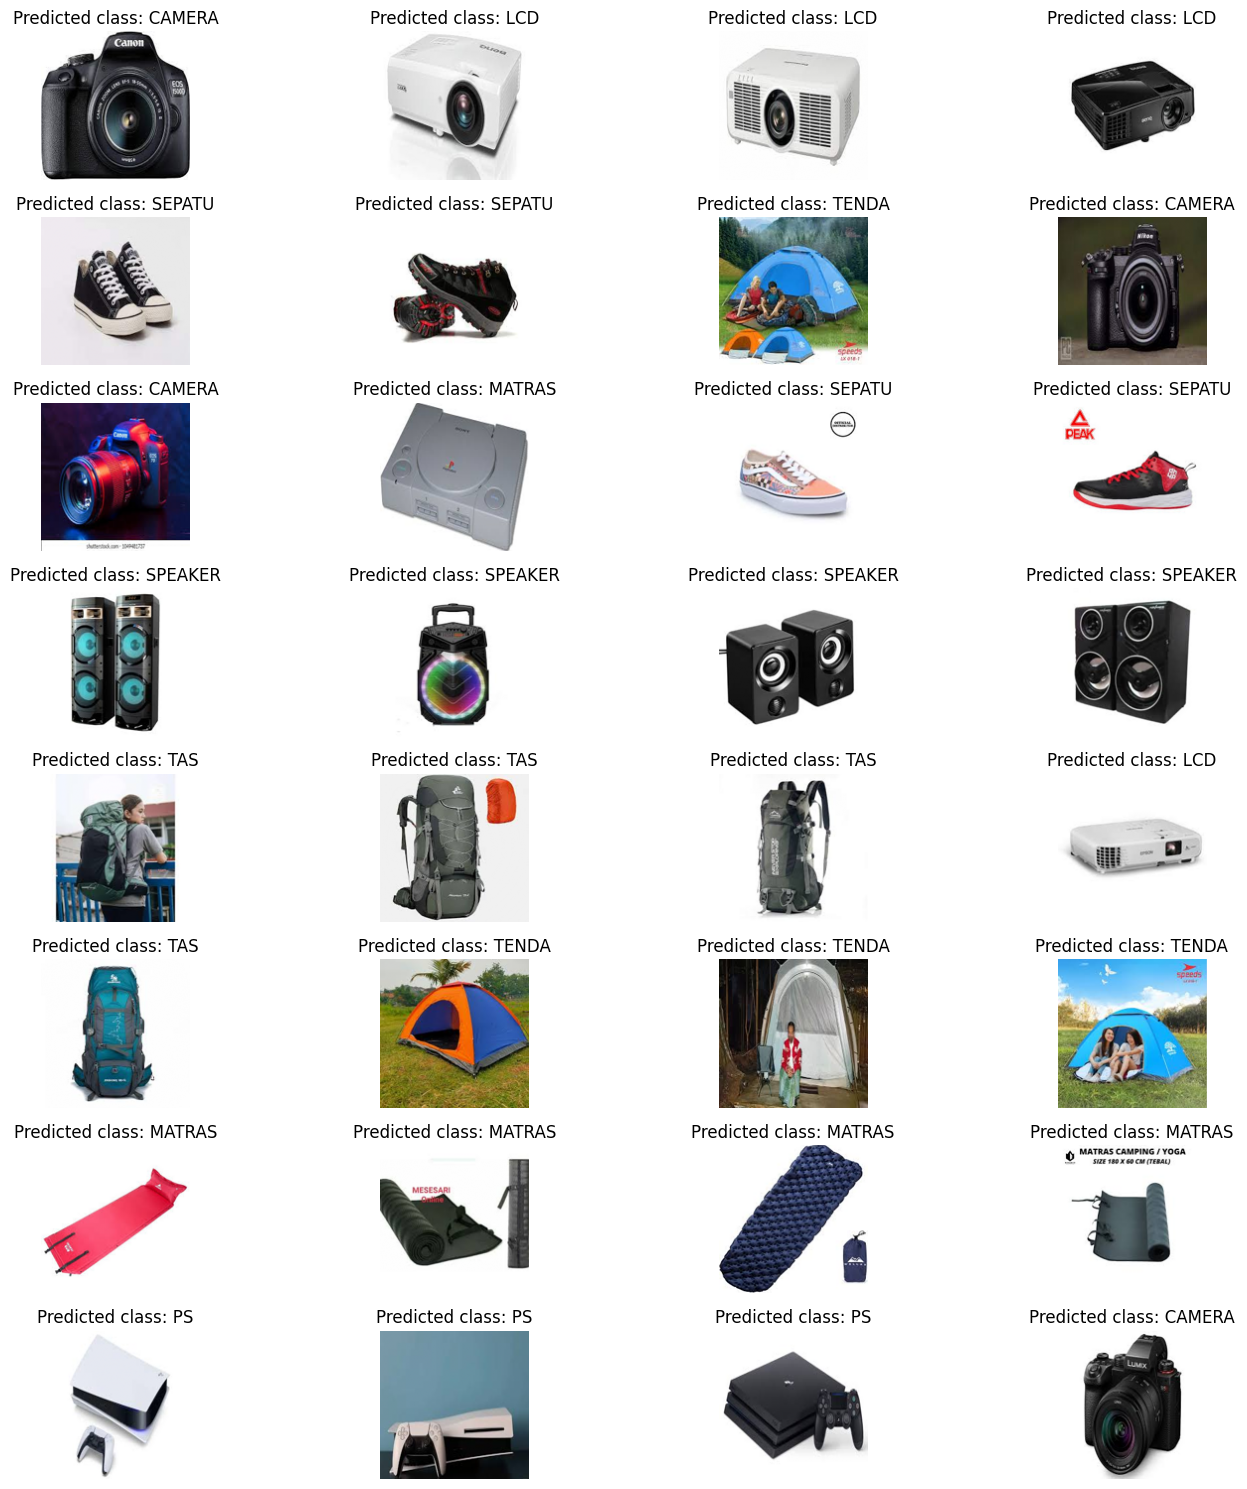

In [12]:
import os
import matplotlib.pyplot as plt

folder_path = r"C:\Users\HP\Documents\SEMESTER 6\BANGKIT 2023\DATASET\tes"

# Daftar file gambar dalam folder
image_files = os.listdir(folder_path)

# Menghitung jumlah gambar
num_images = len(image_files)

# Mengatur jumlah kolom dalam subplot
num_cols = 4

# Menghitung jumlah baris dalam subplot
num_rows = (num_images + num_cols - 1) // num_cols

# Membuat subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Perulangan untuk setiap file gambar
for i, file in enumerate(image_files):
    # Memuat gambar
    image_path = os.path.join(folder_path, file)
    test_image = Image.open(image_path)
    test_image = test_image.resize((150, 150))  # Menyesuaikan ukuran gambar dengan ukuran input model
    test_image = np.array(test_image) / 255.0  # Normalisasi piksel gambar

    # Menambahkan dimensi batch pada gambar
    test_image = np.expand_dims(test_image, axis=0)

    # Melakukan prediksi menggunakan model
    predictions = model.predict(test_image)

    # Mendapatkan kelas prediksi
    predicted_class = np.argmax(predictions)

    # Mengubah kelas prediksi menjadi label kelas
    class_labels = train_generator.class_indices
    predicted_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_class)]

    # Menampilkan gambar dan hasil prediksi pada subplot yang sesuai
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(test_image[0])
    ax.axis('off')  # Menghilangkan sumbu koordinat
    ax.set_title('Predicted class: ' + predicted_label)

# Menampilkan subplot
plt.tight_layout()
plt.show()


KLASIFIKASI KATEGORI 8 jenis barang
silahkan upload gambar CAMERA



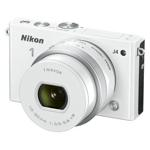

1/1 [==============================] - 0s 121ms/step
HASIL DETEKSINYA: 

Berhasil mengupload CAMERA


In [34]:
print("KLASIFIKASI KATEGORI 8 jenis barang")
inputan = input("Masukkan jenis kategori =  ").upper()
if inputan in ['LCD', 'MATRAS', 'TENDA', 'CAMERA', 'SEPATU', 'SPEAKER','PS','TAS']:
    print("silahkan upload gambar", inputan)
    print()

    # Terima input gambar dari user
    path = input("Masukkan path gambar: ")

    # Mengubah ukuran gambar sesuai dengan kebutuhan model
    img = Image.open(path).resize((150,150))

    # Menampilkan gambar yang di-upload
    display(img)

    # Mengubah gambar menjadi array
    x = np.array(img)
    # Menambahkan dimensi baru ke array
    x = np.expand_dims(x, axis=0)
    # Menggabungkan array menjadi stack
    images = np.vstack([x])

    # Melakukan prediksi dengan model
    predictions = model.predict(images, batch_size=10)

    # Cek hasil prediksi
    print("HASIL DETEKSINYA: ")
    print()


    # Mendapatkan kelas prediksi
    predicted_class = np.argmax(predictions)

    # Mengubah kelas prediksi menjadi label kelas
    class_labels = train_generator.class_indices
    predicted_label = list(class_labels.keys())[list(class_labels.values()).index(predicted_class)]

    if predicted_label is not None:
        if inputan == predicted_label:
            print("Berhasil mengupload", predicted_label)
        else:
            print("Gagal, gambar tersebut adalah", predicted_label, "bukan ", inputan)
else:
    print("kategori", inputan, "tidak tersedia")


      

**SAVE_MODEL TFlie**

In [18]:
# EXERCISE: Save the trained model as a Keras HDF5 file. 

saved_model_path = "./model.h5"
model.save(saved_model_path)
# YOUR CODE HERE


In [19]:
import tensorflow as tf

# Load model dari file .h5
model = tf.keras.models.load_model('model.h5')

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite ke file .tflite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpwuq_cf39\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpwuq_cf39\assets
